In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("vertebral_column_data.txt", header=None, sep=' ', names=("Pelvic Incidence", "Pelvic Tilt", "Lumbar Lordosis Angle", "Sacral Slope", "Pelvic Radius", "Grade of Spondylolisthesis", "Class"))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pelvic Incidence            310 non-null    float64
 1   Pelvic Tilt                 310 non-null    float64
 2   Lumbar Lordosis Angle       310 non-null    float64
 3   Sacral Slope                310 non-null    float64
 4   Pelvic Radius               310 non-null    float64
 5   Grade of Spondylolisthesis  310 non-null    float64
 6   Class                       310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


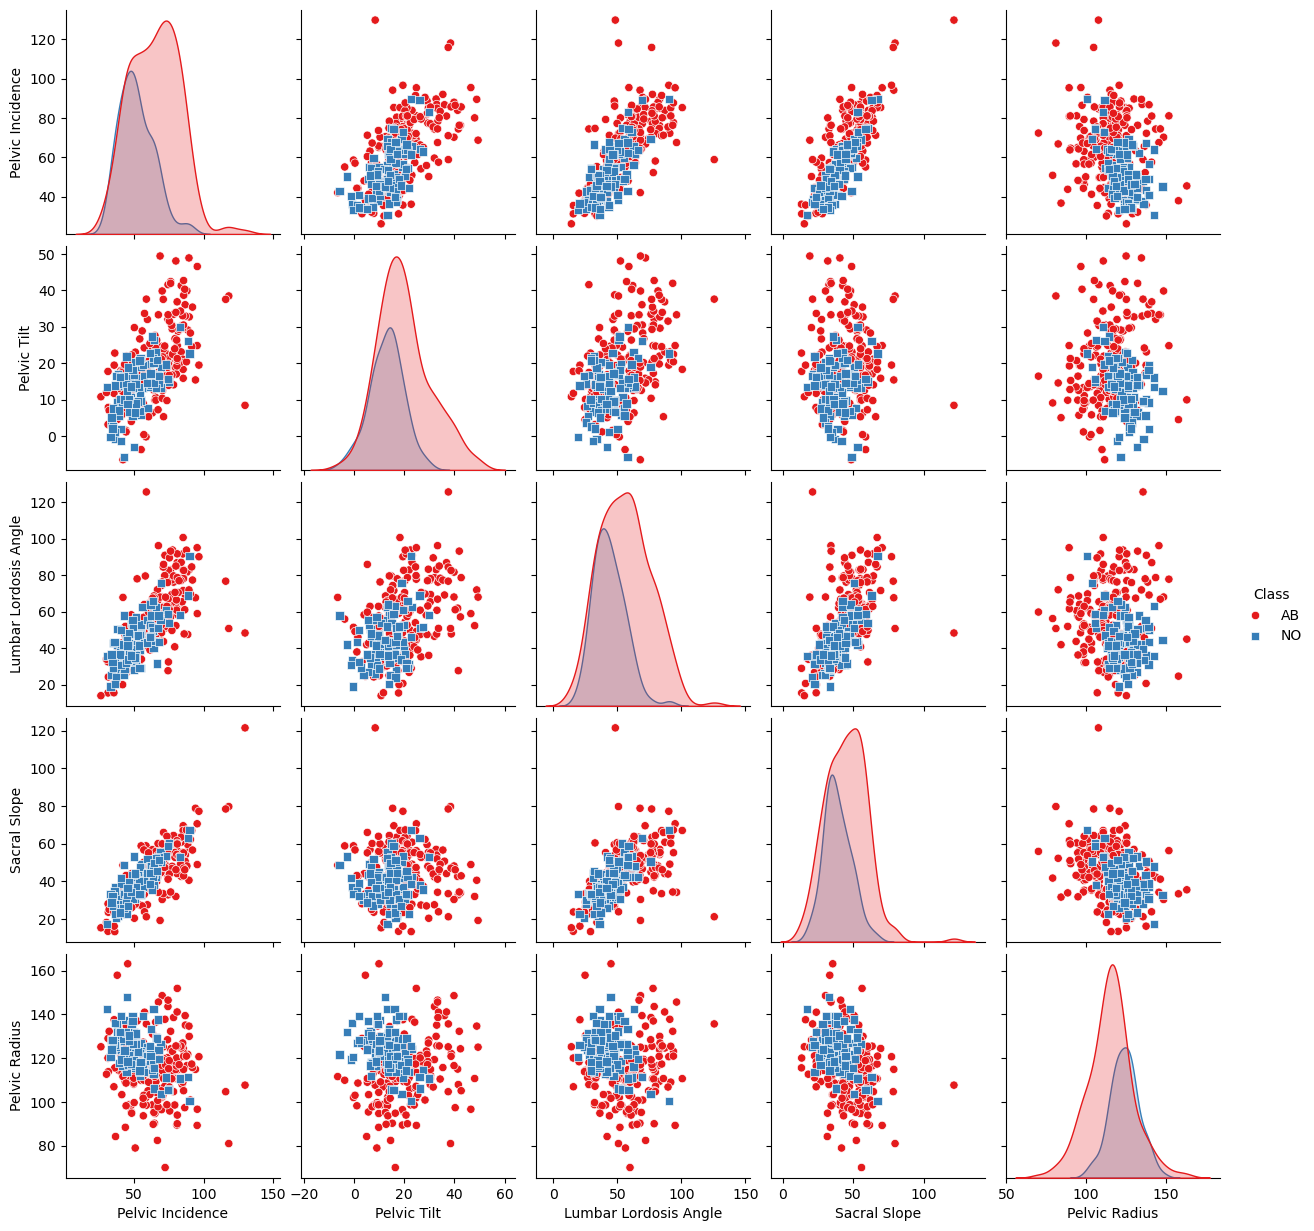

In [5]:
#Figure 2
column_names = ["Pelvic Incidence", "Pelvic Tilt", "Lumbar Lordosis Angle", "Sacral Slope", "Pelvic Radius", "Grade of Spondylolisthesis"
    "Class"]
numeric_features = column_names[:-1]  # all columns except the last one ('class')
X = df[numeric_features].values
names = numeric_features
sns.pairplot(df, vars=numeric_features, hue="Class", diag_kind="kde", palette="Set1", markers=["o", "s"])
plt.savefig("pre_stand.png") 
plt.show()

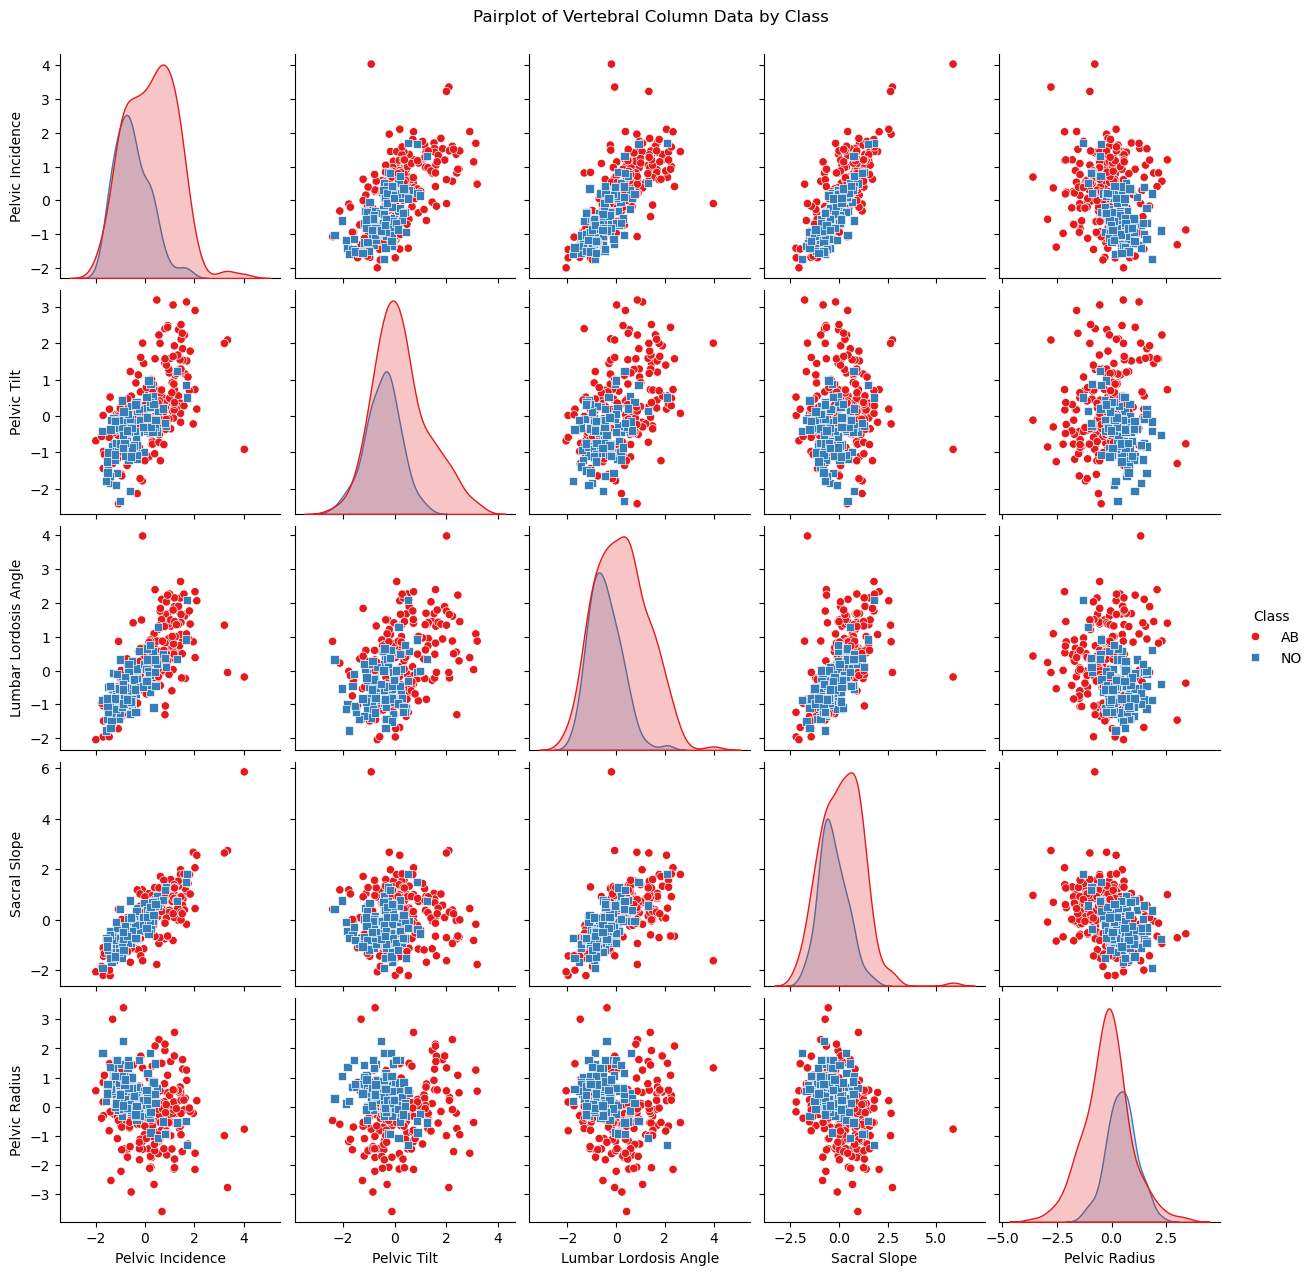

In [6]:
#Figure 4
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

numeric_features = column_names[:-1]  # all columns except the last one ('class')
X = df[numeric_features].values
names = numeric_features
sns.pairplot(df, vars=numeric_features, hue="Class", diag_kind="kde", palette="Set1", markers=["o", "s"])
plt.suptitle("Pairplot of Vertebral Column Data by Class", y=1.02)
plt.savefig("post_stand.png") 
plt.show()

C:\Users\grace\AppData\Local\Temp\ipykernel_39820\1149486075.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df["Class"], palette="coolwarm")


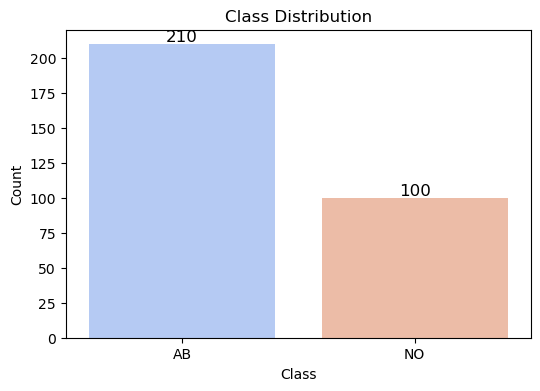

In [8]:
#Figure 5
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df["Class"], palette="coolwarm")

for p in ax.patches:
    ax.annotate(f"{round(p.get_height())}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

# Final formatting
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.savefig("class_hist.png")
plt.show()

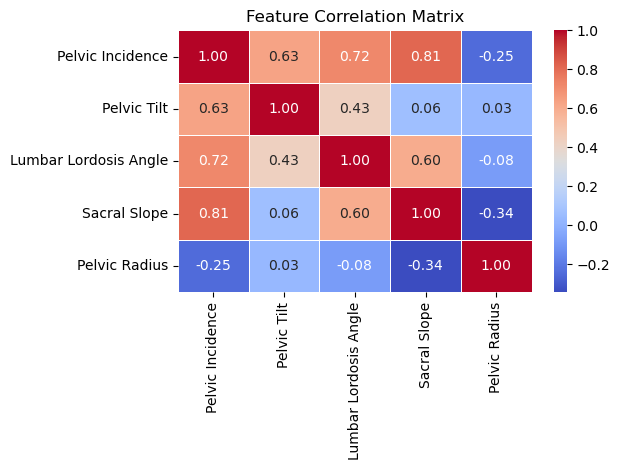

In [9]:
#Figure 
import numpy as np
numeric_features = column_names[:-1]  # all columns except the last one ('class')
X = df[numeric_features].values
names = numeric_features
# Compute correlation matrix
corr_matrix = df[numeric_features].corr()

# Plot heatmap
#plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.tight_layout()  # Ensures all labels fit within the figure

# Save figure with bounding box adjustment
plt.savefig("corr.png", bbox_inches="tight")

plt.show()
